## 4-4: scikit - learn 패키지를 사용한 선형 회귀분석

알려지지않은 공식을 추측하여 미리 최종 성적을 예측해보자?!

In [ ]:
import numpy as np
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점
y = np.array([73,82,72,57,34]) # 최종 성적

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #내재되어있는 함수를 쓰기위한 준비 과정

lr.fit(X,y)

LinearRegression()

y = w1x1 + w2x2 + w3x3 + b

In [ ]:
lr.coef_ #가중치 값 출력(w1,w2,w3)

array([0.38823654, 0.40424492, 0.98136214])

In [ ]:
lr.intercept_ #평향의 값(b)

0.6960065780730318

최종성적 = 0.38823654*중간고사성적 + 0.40424492*기말고사성적 + 0.98136214*가산점 + 0.6960065780730318


In [ ]:
# predict를 이용하여 최종성적 구하기
# fit해준걸로 이런식으로 최종성적을 구하는구나 알고 저 위 공식을 이용하여 최종성적을 구해준 것이다.

new_data = [[60,70,80],[71,90,15]]
y_new = lr.predict(new_data)
y_new

array([130.79631462,  79.36327551])

In [ ]:
lr.coef_[0]*60 + lr.coef_[1]*70 + lr.coef_[2]*80 + lr.intercept_

130.79631462275842

## 자전거 수요 예측

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bike_df = pd.read_csv('https://raw.githubusercontent.com/jesford/bike-sharing/master/train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [ ]:
bike_df["year"] = bike_df["datetime"].dt.year # 연만 추출
bike_df["month"] = bike_df["datetime"].dt.month # 월만 추출
bike_df["day"] = bike_df["datetime"].dt.day # 일만 추출
bike_df["hour"] = bike_df["datetime"].dt.hour # 시간만 추출
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


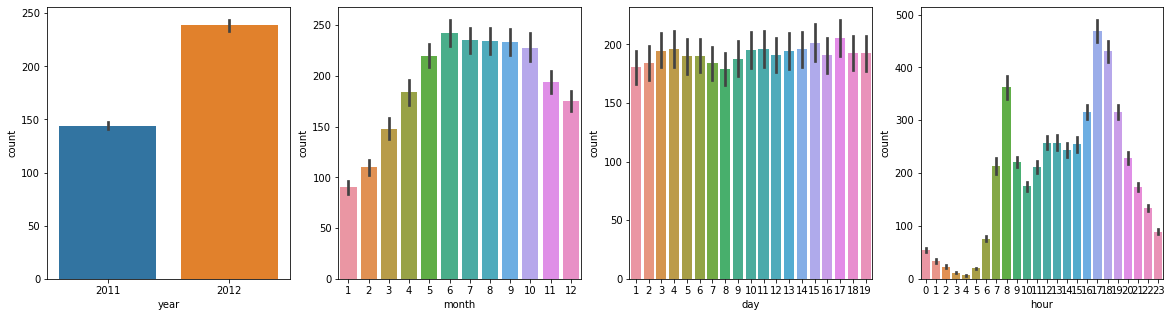

In [ ]:
# 연, 월, 일, 시에 따른 대여량 시각화
figure, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=4)

figure.set_size_inches(20,5)

sns.barplot(data=bike_df, x='year',y='count',ax=ax1)
sns.barplot(data=bike_df, x='month',y='count',ax=ax2)
sns.barplot(data=bike_df, x='day',y='count',ax=ax3)
sns.barplot(data=bike_df, x='hour',y='count',ax=ax4)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working Day Count')]

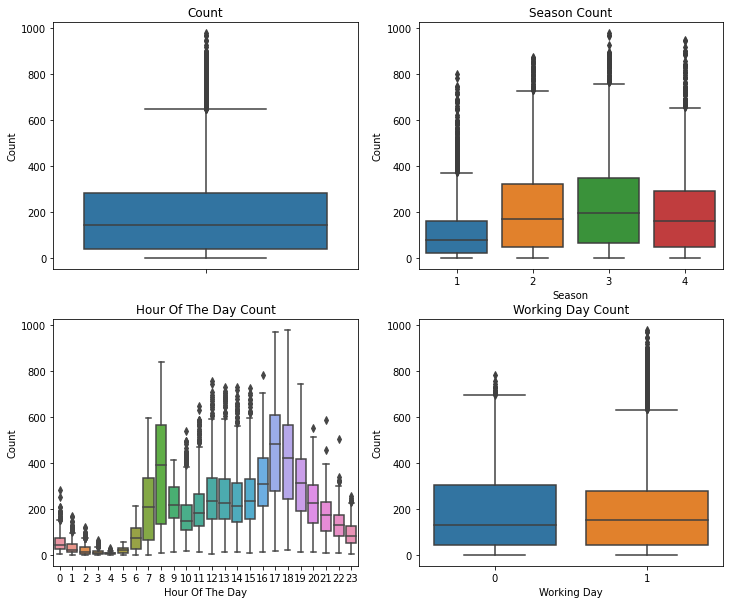

In [ ]:
# 대여량/ 계절별 대여량/ 시간별 대여량/ 주중,주말 대여량 시각화

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2)

fig.set_size_inches(12, 10)
sns.boxplot(data=bike_df, y="count",orient="v",ax=ax1)
sns.boxplot(data=bike_df, y="count",x="season",orient="v",ax=ax2)
sns.boxplot(data=bike_df, y="count",x="hour",orient="v",ax=ax3)
sns.boxplot(data=bike_df, y="count",x="workingday",orient="v",ax=ax4)

ax1.set(ylabel='Count',title="Count")
ax2.set(xlabel='Season', ylabel='Count',title="Season Count")
ax3.set(xlabel='Hour Of The Day', ylabel='Count',title="Hour Of The Day Count")
ax4.set(xlabel='Working Day', ylabel='Count',title="Working Day Count")

In [ ]:
bike_df['dayofweek'] = bike_df['datetime'].dt.dayofweek
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


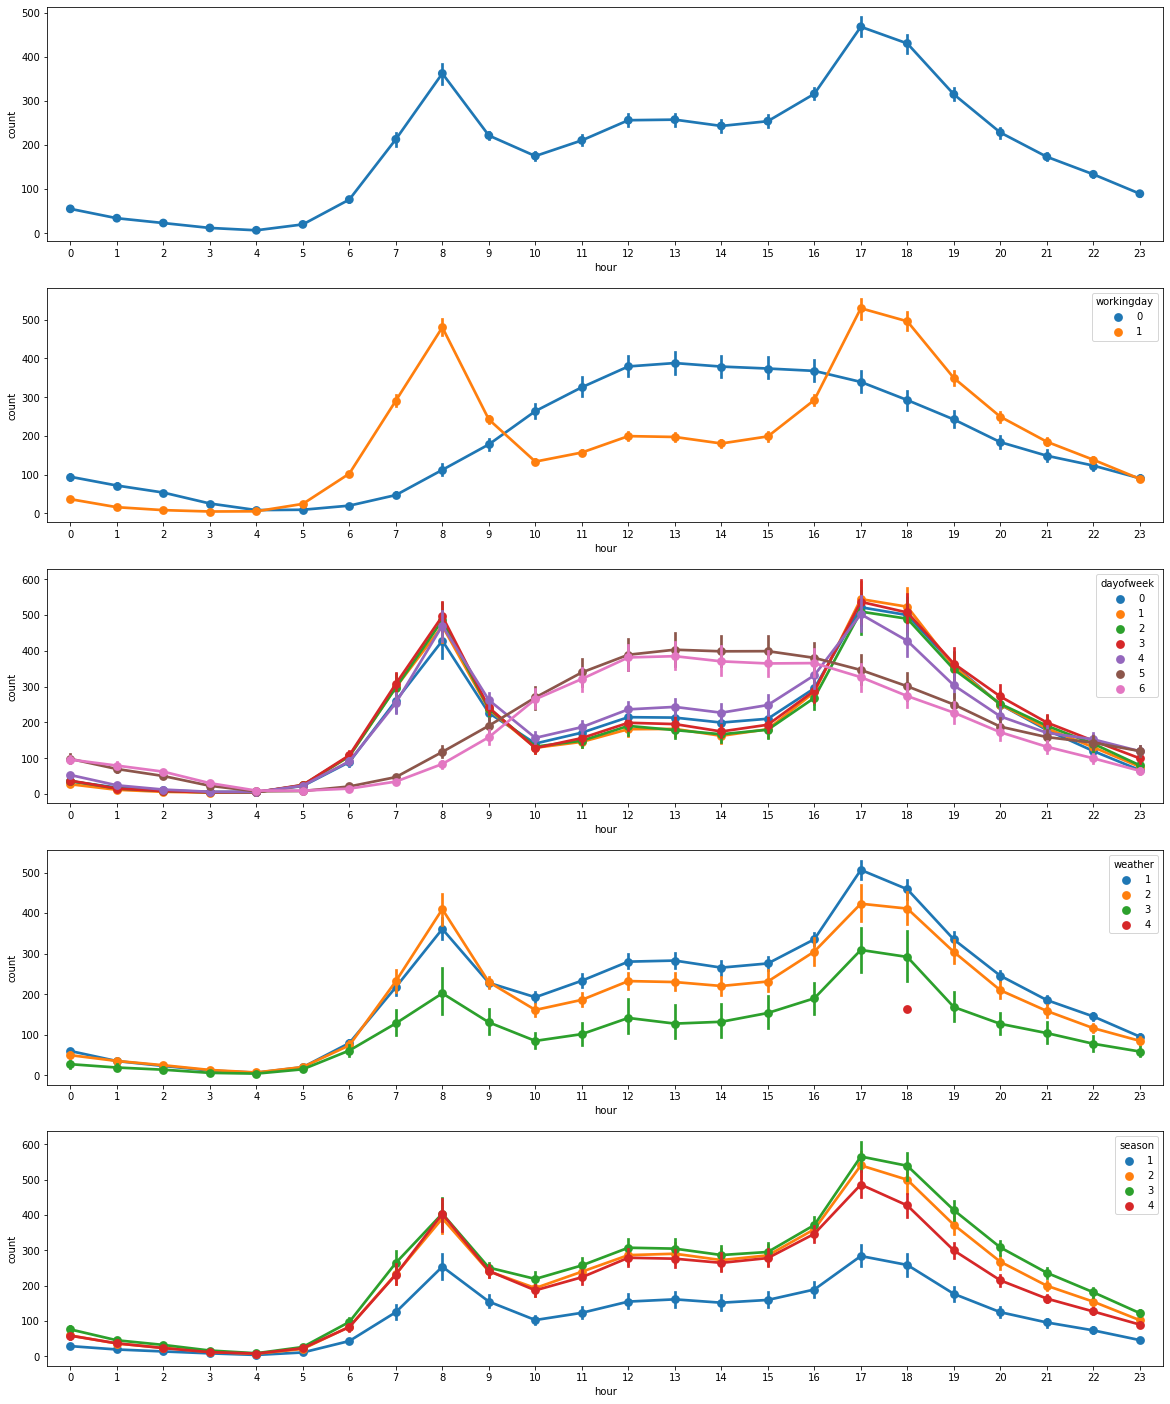

In [ ]:
# 시간대별 대여량 시각화 (요일별/ 주중이나 주말이나/ 날씨/ 계절)

figure, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
figure.set_size_inches(20,25)

sns.pointplot(data=bike_df, x='hour', y='count', ax=ax1)
sns.pointplot(data=bike_df, x='hour', y='count',hue='workingday', ax=ax2)
sns.pointplot(data=bike_df, x='hour', y='count',hue='dayofweek', ax=ax3)
sns.pointplot(data=bike_df, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=bike_df, x='hour', y='count', hue='season',  ax=ax5)

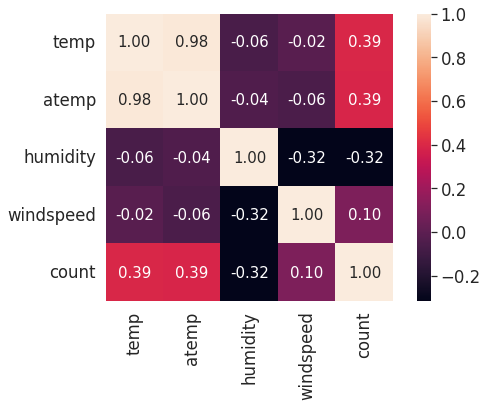

In [ ]:
cols = ["temp", "atemp", "humidity", "windspeed", "count"]
corr = bike_df[cols].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)
plt.tight_layout()
plt.show()

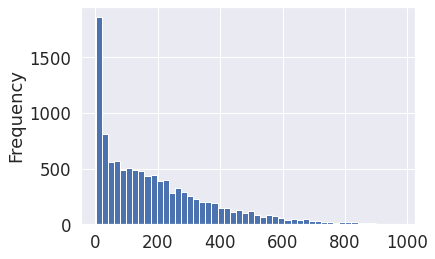

In [ ]:
bike_df['count'].plot(kind='hist', bins=50)

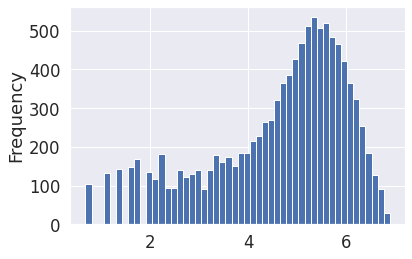

In [ ]:
y_log_transform = np.log1p(bike_df['count'])
y_log_transform.plot(kind='hist', bins=50)

### 평가지표

오차 이용

rmse는 rmsle에서 로그 빼준거  
mse는 rmse에서 루트 빼준거

In [ ]:
def rmsle(y, pred):
		# y : 전체 데이터의 실제값의 리스트 ex) [1, 2, 3, 4]
		# pred : 전체 데이터의 예측값의 리스트 ex) [0.97, 1.85, 2.99, 3.87]
		
		# np.log1p : 입력값에 +1을 한 후 log를 씌운다.
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)

		# 실제값과 예측값의의 차이의 제곱
    squared_error = (log_y - log_pred) ** 2

		# 모든 데이터에 대해 평균을 구한 후(np.mean())
		# 루트를 씌워준다(np.sqrt())
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y, pred):
		# 평균 제곱 오차, MSE에 루트를 씌운다.
    return np.sqrt(mean_squared_error(y, pred))

In [ ]:
# RMSLE, RMSE 계산(둘다 계산)
def calculate_model_score(y, pred):
    rmsle_value = rmsle(y, pred)
    rmse_value = rmse(y, pred)
    print(f'RMSLE: {rmsle_value:.3f}, RMSE: {rmse_value:.3f}')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 자전거 수요 예측 프로젝트 실전

타겟: count

In [ ]:
# 데이터 불러오기
# parse_dates=["datetime"]을 해주면 데이터에서 날짜부분을 자동으로 타입을 datetime으로 변경해준다.
train = pd.read_csv('https://raw.githubusercontent.com/jesford/bike-sharing/master/train.csv', parse_dates=["datetime"])

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


casual과 registered 제거!

왜냐하면 그 둘을 더하면 타겟의 값이 된다.  
이는 예측하는 것이 아니라 이미 아는 사실이므로 제거를 해줘야 예측이 된다.

In [ ]:
drop_columns = ['datetime','casual','registered']
train.drop(drop_columns, axis=1, inplace=True)

In [ ]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [ ]:
y_target = train['count']
x_feature = train.drop(['count'],axis=1,inplace=False)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size = .3, random_state=777) #random_state=777은 데이터를 섞어준다.

In [ ]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

def rmsle(y, pred):
                # y : 전체 데이터의 실제값의 리스트 ex) [1, 2, 3, 4]
                # pred : 전체 데이터의 예측값의 리스트 ex) [0.97, 1.85, 2.99, 3.87]
                
                # np.log1p : 입력값에 +1을 한 후 log를 씌운다.
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)

                # 실제값과 예측값의의 차이의 제곱
    squared_error = (log_y - log_pred) ** 2

                # 모든 데이터에 대해 평균을 구한 후(np.mean())
                # 루트를 씌워준다(np.sqrt())
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
                # 평균 제곱 오차, MSE에 루트를 씌운다.
    return np.sqrt(mean_squared_error(y, pred))

# RMSLE, RMSE 계산
def calculate_model_score(y, pred):
    rmsle_value = rmsle(y, pred)
    rmse_value = rmse(y, pred)
    print(f'RMSLE: {rmsle_value:.3f}, RMSE: {rmse_value:.3f}')

In [ ]:
calculate_model_score(y_test, pred)

RMSLE: 1.157, RMSE: 143.207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log1p
  if __name__ == '__main__':


오차를 줄이기 위한 방법

1. 로그화

In [ ]:
y_log_transform = np.log1p(y_target)

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_log_transform, test_size = .3, random_state=777) #random_state=777은 데이터를 섞어준다.

In [ ]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

rmsle를 하게 되면 로그화를 두번이나 하게 되므로 그것은 정확한 오차가 아니다.

따라서 로그화해준 것을 다시 원래 값으로 변환해주어야한다. -> np.expm1

In [ ]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

calculate_model_score(y_test_exp, pred_exp)

RMSLE: 1.011, RMSE: 162.942


모든 지표에서 로그화가 다 도움이 되는 것은 아니다라는거 확인!  
rmsle는 좋아졌지만 rmse는 더 안좋아졌다.

In [ ]:
x_feature

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


- 범주형 변수를 더미 변수로 변환

In [ ]:
x_feature_dummy = pd.get_dummies(x_feature, columns=['year','day','month','hour','season','holiday','workingday','weather'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_feature_dummy, y_log_transform, test_size = .3, random_state=777) #random_state=777은 데이터를 섞어준다.

In [ ]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [ ]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

calculate_model_score(y_test_exp, pred_exp)

RMSLE: 0.600, RMSE: 96.837


더미형 변수로 바꿔주니 예측력이 더 좋아졌다.

### 가중치 시각화

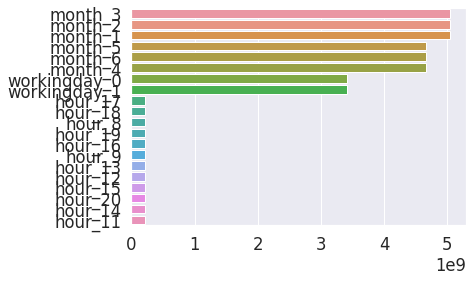

In [ ]:
import seaborn as sns

# lr.coef_ : 가중치 값
# 가중치가 높은것부터 차례로 내림차순

coefs = pd.DataFrame(zip(x_feature_dummy.columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs = coefs.sort_values(by=['coefficients'], ascending=False).reset_index(drop=True)

sns.barplot(x=coefs['coefficients'][:20].values, y=coefs['feature'][:20].values)

### 앞서 진행했던 것들 요약

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
train = pd.read_csv('https://raw.githubusercontent.com/jesford/bike-sharing/master/train.csv', parse_dates=["datetime"])

# year, month, day, hour 생성
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour

# 필요없는 열 삭제
drop_columns = ['datetime', 'casual', 'registered']
train.drop(drop_columns, axis=1, inplace=True)

# x, y 분리하기
y_target = train['count']
x_features = train.drop(['count'], axis=1, inplace=False)

# 범주형 변수 활용
x_features_dummy = pd.get_dummies(x_features,
                               columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

# 훈련, 테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x_features_dummy, y_target, test_size = .3, random_state=777)

# 선형회귀 모델에 학습
lr = LinearRegression()
lr.fit(x_train, y_train)

# 정확도 출력: 정확도(평가지표)
print(lr.score(x_test, y_test))
print(lr.score(x_train, y_train))

0.6835371635628911
0.6982715399999174


In [ ]:
from sklearn.linear_model import Ridge

rg = Ridge(alpha=2.5) #alpha는 규제를 하고자 하는 정도
rg.fit(x_train, y_train)
# 규제는 적당하게 해야지 정확도가 올라간다. 너무 과하거나 적으면 정확도 감소

Ridge(alpha=2.5)

In [ ]:
print(rg.score(x_test, y_test))
print(rg.score(x_train, y_train))

0.6835790109552676
0.698191927089896


과적합이 없었기 때문에 lr과 rg의 값차이가 거의 나지않는다.

### 라쏘 회귀
L1 규제를 사용하여 과적합 예방

In [ ]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.1)
ls.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
print(ls.score(x_test, y_test))
print(ls.score(x_train, y_train))

0.683608634543128
0.6977614136007022


## 4-11 수정 후 실험하기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression

# 앞서 진행한 데이터 불러오는 과정 ~ 필요한 열 생성 과정 요약
# 데이터 불러오기
train = pd.read_csv('https://raw.githubusercontent.com/jesford/bike-sharing/master/train.csv', parse_dates=["datetime"])

# year, month, day, hour 열 생성
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
# 불필요한 열 삭제
drop_columns = ['datetime', 'casual', 'registered']
train.drop(drop_columns, axis=1, inplace=True)

### StandardScaler
StandardScaler은 데이터 범위가 엄청 늘어났을 때 쓰면 유용하다.(클 때)  
그리고 데이터 수 자체가 너무 많아졌을 때 써도 학습의 속도가 빨라진다.  

데이터가 너무 많거나 범위가 커서 warning이 나오거나 학습 속도가 느리거나 최적화가 안되는 경우가 있다.  
그럴 때 StandardScaler을 써주면 도움이 된다. warning 제거

In [ ]:
from sklearn.preprocessing import StandardScaler # 평균은 0, 표준편차는 1

scaler = StandardScaler()
count_scaled = scaler.fit_transform(train['count'].values.reshape(-1,1))

In [ ]:
train['count'].values.reshape(-1,1)

array([[ 16],
       [ 40],
       [ 32],
       ...,
       [168],
       [129],
       [ 88]])

In [ ]:
train['count'].values

array([ 16,  40,  32, ..., 168, 129,  88])

In [ ]:
count_scaled

array([[-0.9692938 ],
       [-0.83679677],
       [-0.88096245],
       ...,
       [-0.13014594],
       [-0.34545361],
       [-0.57180271]])

In [ ]:
train.insert(0,'count_scaled',count_scaled) # 0번째 해당하는 열에다가 해당 count_scaled 열을 넣어주겠다.
train

,count_scaled,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,-0.969294,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,-0.836797,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,-0.880962,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,-0.985856,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,-1.052104,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.797333,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,0.272866,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,-0.130146,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,-0.345454,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


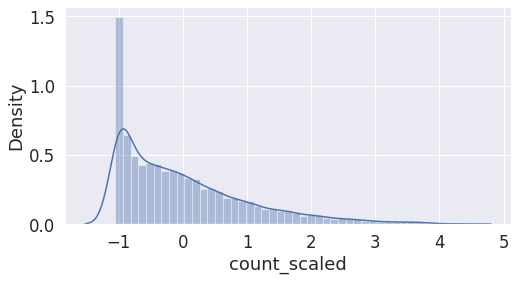

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(train['count_scaled'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


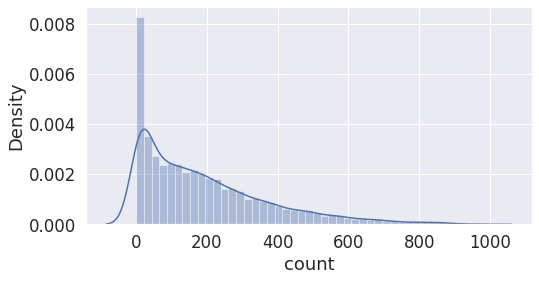

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(train['count'])

In [ ]:
y_target = train['count_scaled']
x_features = train.drop(['count','count_scaled'], axis=1, inplace=False)

x_features_dummy = pd.get_dummies(x_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features_dummy, y_target, test_size=.3, random_state=777)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(lr.score(x_test, y_test))
print(lr.score(x_train, y_train))

0.6835369051528182
0.6982715591424864


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression

# 앞서 진행한 데이터 불러오는 과정 ~ 필요한 열 생성 과정 요약
# 데이터 불러오기
train = pd.read_csv('https://raw.githubusercontent.com/jesford/bike-sharing/master/train.csv', parse_dates=["datetime"])

# year, month, day, hour 열 생성
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
# 불필요한 열 삭제
drop_columns = ['datetime', 'casual', 'registered']
train.drop(drop_columns, axis=1, inplace=True)

### 습도의 이상치 찾아내기

In [ ]:
# humidity 열을 fraud 라는 변수로 저장
fraud = train['humidity']

# Numpy의 percential 함수는 입력한 값의 %의 분위값을 추출해준다.
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

# IQR에 1.5를 곱한다.
iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5

# 최솟값과 최댓값 연산.
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

# 아웃라이어 필터링 (최솟값보다 작거나 최댓값보다 큰 데이터를 추출) 후 인덱스만 저장
outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

In [ ]:
outlier_index

Int64Index([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
            1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112],
           dtype='int64')

In [ ]:
train.drop(outlier_index,axis=0,inplace=True) #axis=0은 행

In [ ]:
len(train)

10864

In [ ]:
y_target = train['count']
x_features = train.drop(['count'], axis=1, inplace=False)
# 범주형 변수 활용
x_features_dummy = pd.get_dummies(x_features,
                               columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])
# X_data와 y_data를 7:3 비율로 분할
x_train, x_test, y_train, y_test = train_test_split(x_features_dummy, y_target, test_size=.3, random_state=777)

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))
print(lr.score(x_train, y_train))

0.6721293332219008
0.7037352545737487
